#### PROJECT : KIDNEY DISEASE DIAGNOSIS

#### AUTHOR : PRIYADHARSHINI R

#### -------------------------------------------------------------------- WORK FLOW OF PROJECT ---------------------------------------------------------------------

#### 1. Data Collection

             Kaggle: https://www.kaggle.com/mansoordaku/ckdisease
             Number of Records: 400
             Number of Attributes: 26
    
#### 2. Data Pre-Processing
            
            1. Deleting redundant columns.
            2. Renaming the columns.
            3. Dropping duplicates.
            4. Cleaning individual columns.
            5. Remove the NaN values from the dataset
            6. Some Transformations

#### 3. Exploratory Data Analysis
            
             1. Univariate Analysis
             2. Bivariate Analysis
             
#### 4. Machine learning Models
             1. Logistic Regression
             2. K Nearest Neighbor
             3. Random Forest Classifier
             4. Decision Tree Classifier

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Exploratory Data Analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

#Machine learning models

from sklearn import model_selection, feature_selection, ensemble, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier

#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

#### LOADING DATASET

In [2]:
#read_dataset
data = pd.read_csv('kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


#### Dataset : Chronic Kidney Disease
Number of Records : 400 , 
Number of Attributes : 26

In [3]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


#### DATASET PRE PROCESSING

#### Types of Attributes

Numerical:

1. Age
2. Blood Pressure
3. Blood Glucose Random
4. Blood Urea
5. Serum Creatinine
6. Sodium
7. Potassium
8. Hemoglobin
9. Packed Cell Volume
10. White Blood Cell Count
11. Red Blood Cell Count

Nominal:

1. Specific Gravity
2. Albumin
3. Sugar
4. Red Blood Cells
5. Pus Cell
6. Pus Cell Clumps
7. Bacteria
8. Hypertension
9. Diabetes Mellitus
10. Coronary Artery Disease
11. Appetite
12. Pedal Edema
13. Anemia
14. Classification(Target)

#### 1. Renaming Attributes

In [4]:
data.rename(columns = {'id':'ID','age':'Age','bp':'Blood_Pressure','sg':'Specific_Gravity','al':'Albumin','su':'Sugar','rbc':'Red_Blood_Cells','pc':'Pus_Cell','pcc':'Pus_Cell_Clumps','ba':'Bacteria','bgr':'Blood_Glucose_Random','bu':'Blood_Urea','sc':'Serum_Creatinine','sod':'Sodium','pot':'Potassium','hemo':'Hemoglobin','pcv':'Packed_Cell_Volume','wc':'White_Blood_Cell_Count','rc':'Red_Blood_Cell_Count','htn':'Hypertension','dm':'Diabetes_Mellitus','cad':'Coronary_Artery_Disease','appet':'Appetite','pe':'Pedal_Edema','ane':'Anemia','classification':'Target'}, inplace = True)

In [5]:
data.head()

,ID,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### 2. Checking for Null values

In [6]:
data.isnull().sum()

ID                           0
Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          70
White_Blood_Cell_Count     105
Red_Blood_Cell_Count       130
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Target                       0
dtype: int64

Since there are so many null values present in the dataset, it is important to analyze each attribute and replace null values  with meaningful values.

#### 3. Splitting Numerical and Nominal Attributes

In [7]:
Numerical = data[['Age','Blood_Pressure','Blood_Glucose_Random','Blood_Urea','Serum_Creatinine','Sodium','Potassium','Hemoglobin','Packed_Cell_Volume','White_Blood_Cell_Count','Red_Blood_Cell_Count']]
Nominal = data[['Specific_Gravity','Albumin','Sugar','Red_Blood_Cells','Pus_Cell','Pus_Cell_Clumps','Bacteria','Hypertension','Diabetes_Mellitus','Coronary_Artery_Disease','Appetite','Pedal_Edema','Anemia','Target']]

#### 4. Replacing Numerical Null and NaN values with Mean Values

In [8]:
Numerical= Numerical.fillna("")

In [9]:
Numerical.replace('',0,inplace=True)

In [10]:
mean = Numerical.mean()

In [11]:
Numerical.replace(0,mean,inplace=True)

In [12]:
Numerical['Age'] = Numerical['Age'].astype('int')
Numerical['Blood_Pressure'] = Numerical['Blood_Pressure'].astype('int')

In [13]:
Numerical['Packed_Cell_Volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', 0,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [14]:
Numerical.replace('\t43',43,inplace=True)
Numerical.replace('\t?',49,inplace=True)

In [15]:
Numerical['Packed_Cell_Volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', 0,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', 49, '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', 43, '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [16]:
Numerical['Red_Blood_Cell_Count'].unique()

array(['5.2', 0, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', 49, '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [17]:
Numerical['Packed_Cell_Volume'] = Numerical['Packed_Cell_Volume'].astype('int')
Numerical['White_Blood_Cell_Count'] = Numerical['White_Blood_Cell_Count'].astype('int')
Numerical['Red_Blood_Cell_Count'] = Numerical['Red_Blood_Cell_Count'].astype('float')

In [18]:
Numerical.isnull().sum()

Age                       0
Blood_Pressure            0
Blood_Glucose_Random      0
Blood_Urea                0
Serum_Creatinine          0
Sodium                    0
Potassium                 0
Hemoglobin                0
Packed_Cell_Volume        0
White_Blood_Cell_Count    0
Red_Blood_Cell_Count      0
dtype: int64

#### 5. Dealing with Nominal Atrributes

In [19]:
Nominal['Diabetes_Mellitus'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [20]:
Nominal['Diabetes_Mellitus'].replace('\tno','no',inplace=True)
Nominal['Diabetes_Mellitus'].replace(' yes','yes',inplace=True)
Nominal['Diabetes_Mellitus'].replace('\tyes','yes',inplace=True)

In [21]:
Nominal['Coronary_Artery_Disease'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [22]:
Nominal['Coronary_Artery_Disease'].replace('\tno','no',inplace=True)

In [23]:
Nominal['Target'].replace('ckd\t','ckd',inplace=True)

Replacing 0 with Mode values

In [24]:
Nominal = Nominal.fillna("")
Nominal.replace('',0,inplace=True)

In [25]:
for col in Nominal:
    Nominal[col]=Nominal[col].replace(0,data[col].mode()[0])

In [26]:
Nominal

,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target
0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.020,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,1.010,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,1.010,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.020,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,1.020,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,1.025,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


#### The Dataset has been Pre Processed and there is no Null values and Nan values present in the dataset and there is no data loss

In [27]:
data = pd.concat([Numerical, Nominal], axis=1, join='inner')
display(data)

,Age,Blood_Pressure,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,...,Pus_Cell,Pus_Cell_Clumps,Bacteria,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target
0,48,80,121.0000,36.0,1.2,107.61625,3.60925,15.4,44,7800,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7,50,131.7525,18.0,0.8,107.61625,3.60925,11.3,38,6000,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62,80,423.0000,53.0,1.8,107.61625,3.60925,9.6,31,7500,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48,70,117.0000,56.0,3.8,111.00000,2.50000,11.2,32,6700,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51,80,106.0000,26.0,1.4,107.61625,3.60925,11.6,35,7300,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,140.0000,49.0,0.5,150.00000,4.90000,15.7,47,6700,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,42,70,75.0000,31.0,1.2,141.00000,3.50000,16.5,54,7800,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,12,80,100.0000,26.0,0.6,137.00000,4.40000,15.8,49,6600,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,17,60,114.0000,50.0,1.0,135.00000,4.90000,14.2,51,7200,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


#### 6. Converting Categorical to Numerical

In [28]:
cat_dict = {    "Red_Blood_Cells":              {"normal": 1, "abnormal": 0},
                "Pus_Cell":                     {"normal": 1, "abnormal": 0},
                "Pus_Cell_Clumps":              {"present": 1, "notpresent": 0},
                "Bacteria":                     {"present": 1, "notpresent": 0},
                "Hypertension":                 {"yes": 1, "no": 0},
                "Diabetes_Mellitus":            {"yes": 1, "no": 0},
                "Coronary_Artery_Disease":      {"yes": 1, "no": 0},
                "Pedal_Edema":                  {"yes": 1, "no": 0},
                "Anemia":                       {"yes": 1, "no": 0},
                "Appetite":                     {"good": 1, "poor": 0},
                "Target":                       {"ckd": 1, "notckd": 0} 
            }

In [29]:
data.replace(cat_dict, inplace=True)

#### 8. Dropping Duplicates

In [30]:
data.drop_duplicates(inplace=True,keep=False)

In [31]:
data

,Age,Blood_Pressure,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,...,Pus_Cell,Pus_Cell_Clumps,Bacteria,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Target
0,48,80,121.0000,36.0,1.2,107.61625,3.60925,15.4,44,7800,...,1,0,0,1,1,0,1,0,0,1
1,7,50,131.7525,18.0,0.8,107.61625,3.60925,11.3,38,6000,...,1,0,0,0,0,0,1,0,0,1
2,62,80,423.0000,53.0,1.8,107.61625,3.60925,9.6,31,7500,...,1,0,0,0,1,0,0,0,1,1
3,48,70,117.0000,56.0,3.8,111.00000,2.50000,11.2,32,6700,...,0,1,0,1,0,0,0,1,1,1
4,51,80,106.0000,26.0,1.4,107.61625,3.60925,11.6,35,7300,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,140.0000,49.0,0.5,150.00000,4.90000,15.7,47,6700,...,1,0,0,0,0,0,1,0,0,0
396,42,70,75.0000,31.0,1.2,141.00000,3.50000,16.5,54,7800,...,1,0,0,0,0,0,1,0,0,0
397,12,80,100.0000,26.0,0.6,137.00000,4.40000,15.8,49,6600,...,1,0,0,0,0,0,1,0,0,0
398,17,60,114.0000,50.0,1.0,135.00000,4.90000,14.2,51,7200,...,1,0,0,0,0,0,1,0,0,0


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### EXPLORATORY DATA ANALYSIS

In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. 

It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

1. Univariate Data Analysis
2. Bivariate Data Analysis 

#### 1. UNIVARIATE ANALYSIS

#### A. AGE DISTRIBUTION

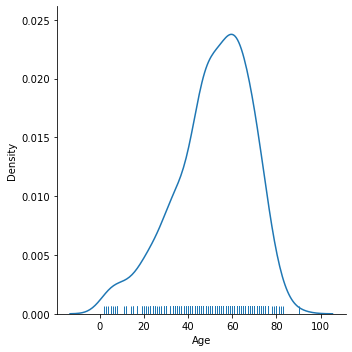

In [32]:
sns.displot(data, x="Age", kind="kde", rug=True)

#### From the above graph, Age group mostly lies between 40 - 75. The age above 80 and below 20 are very rare

#### B. TARGET PERCENTAGE

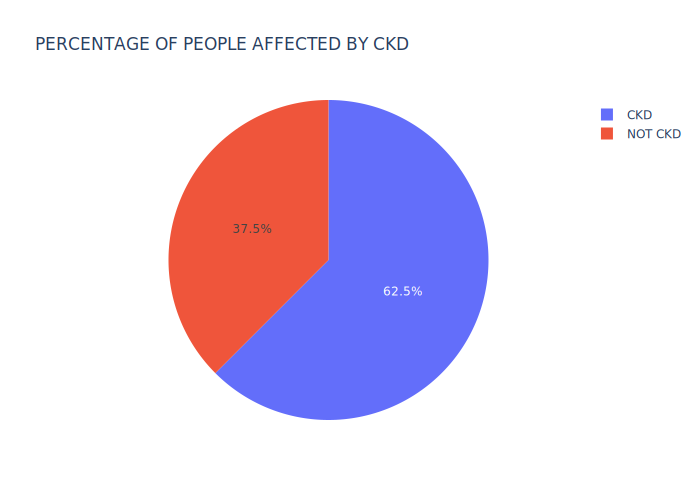

It is Observed that 62.5% of People affected by CKD and 37.5% of People is Not affected by CKD


In [33]:
x=data['Target'].value_counts()
labels=['CKD', 'NOT CKD']

fig = px.pie(data, values=x,names=labels, title='PERCENTAGE OF PEOPLE AFFECTED BY CKD')
fig.show("svg")

print("It is Observed that 62.5% of People affected by CKD and 37.5% of People is Not affected by CKD")

#### C. CORONARY ARTERY DISEASE

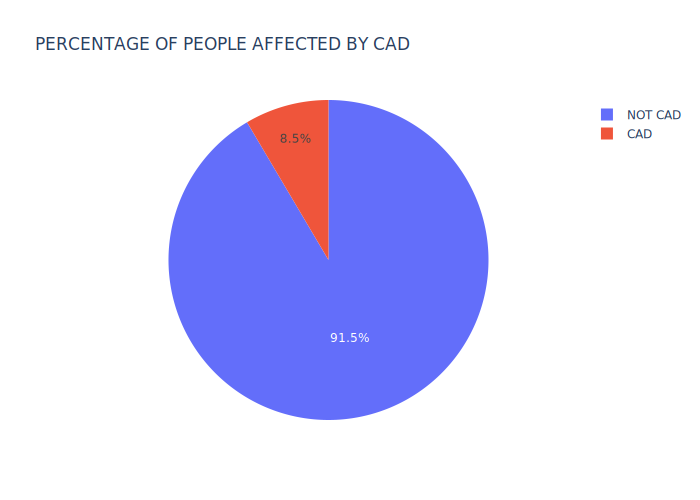

It is Observed that 91.5% of People Not affected by CAD and 8.5% of People is affected by CAD


In [34]:
x=data['Coronary_Artery_Disease'].value_counts()
labels=['NOT CAD', 'CAD']

fig = px.pie(data, values=x,names=labels, title='PERCENTAGE OF PEOPLE AFFECTED BY CAD')
fig.show("svg")

print("It is Observed that 91.5% of People Not affected by CAD and 8.5% of People is affected by CAD")

#### D. DIABETES ANALYSIS

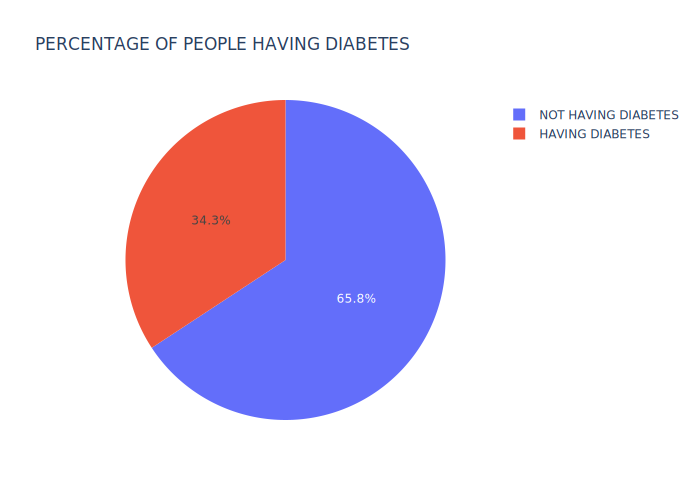

It is Observed that 65.8% of People Not having Diabetes and 34.3% of People is having Diabetes


In [35]:
x=data['Diabetes_Mellitus'].value_counts()
labels=['NOT HAVING DIABETES', 'HAVING DIABETES']

fig = px.pie(data, values=x,names=labels, title='PERCENTAGE OF PEOPLE HAVING DIABETES')
fig.show("svg")

print("It is Observed that 65.8% of People Not having Diabetes and 34.3% of People is having Diabetes")

#### E. HYPERTENSION ANALYSIS

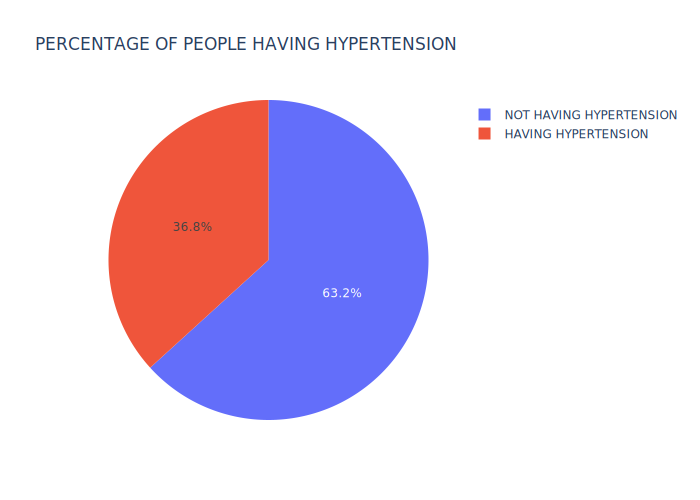

It is Observed that 63.2% of People Not having Diabetes and 36.8% of People is having Diabetes


In [36]:
x=data['Hypertension'].value_counts()
labels=['NOT HAVING HYPERTENSION', 'HAVING HYPERTENSION']

fig = px.pie(data, values=x,names=labels, title='PERCENTAGE OF PEOPLE HAVING HYPERTENSION')
fig.show("svg")

print("It is Observed that 63.2% of People Not having Diabetes and 36.8% of People is having Diabetes")

#### F. APPETITE ANALYSIS

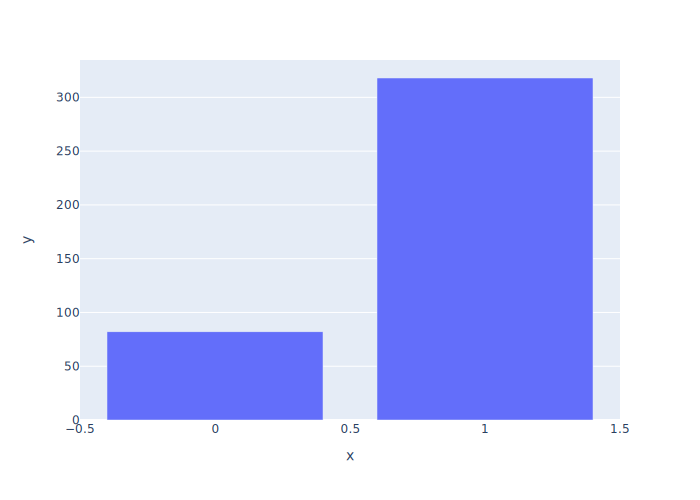

From the bar graph, it is observed that people having appetite is high when compared to not having appetite


In [37]:
fig = px.bar(data, x=data['Appetite'].value_counts().index, y=data['Appetite'].value_counts())
fig.show("svg")
print("From the bar graph, it is observed that people having appetite is high when compared to not having appetite")

#### G. PEOPLE AFFECTED BY ANEMIA

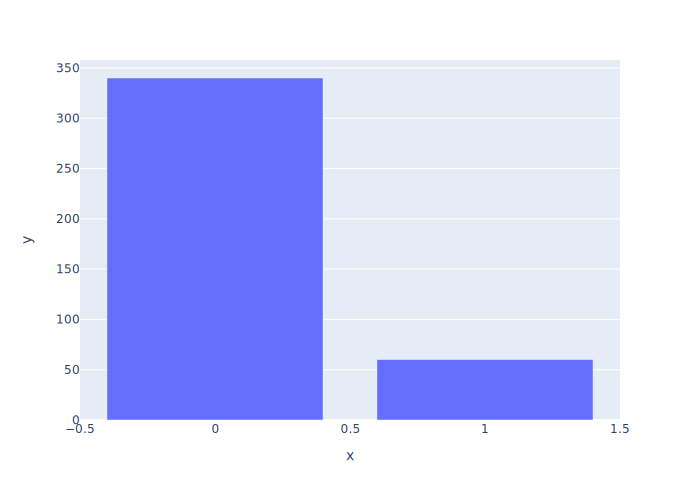

In [38]:
fig = px.bar(data, x=data['Anemia'].value_counts().index, y=data['Anemia'].value_counts())
fig.show("svg")

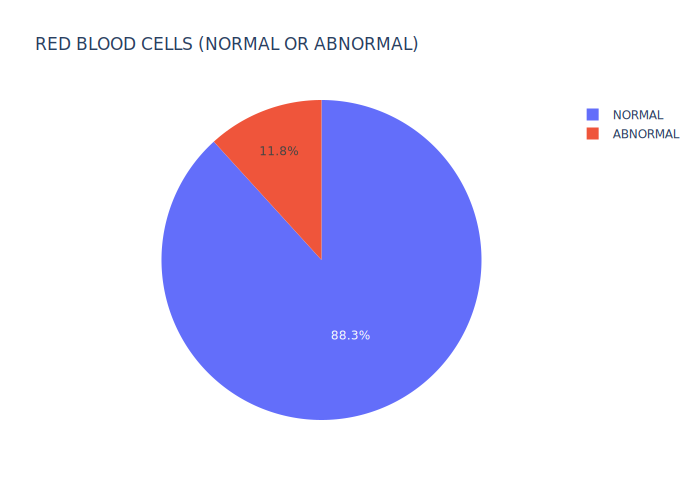

It is Observed that 88.3% of People have Normal and 11.8% of People have Abnormal


In [39]:
x=data['Red_Blood_Cells'].value_counts()
labels=['NORMAL', 'ABNORMAL']

fig = px.pie(data, values=x,names=labels, title='RED BLOOD CELLS (NORMAL OR ABNORMAL)')
fig.show("svg")

print("It is Observed that 88.3% of People have Normal and 11.8% of People have Abnormal")

#### Inference from Univariate Analysis

1. Age Distribution: People of Age between 40-60 are high
2. Chronic Kidney Disease: Nearly 62.5% of people affected by CKD
3. Coronary Artery Disease: 91.5% of People are not having Coronary Artery Disease
4. Diabetes Analysis: 65.8% of people not having Diabetes.
5. Hypertension: 63.2% of people not having Hypertension
6. Appetite: People having Appetite are high when compared to people not having Appetite.
7. Anemia: The count of People affected by Anemia are comparatively less.
8. Red Blood Cells: Normal: 88.3%, Abnormal: 11.8%

#### BIVARIATE ANALYSIS

#### A. Red Blood Cell Count vs Hemoglobin

In [40]:
data['Red_Blood_Cell_Count'].replace(49,4.9,inplace=True)

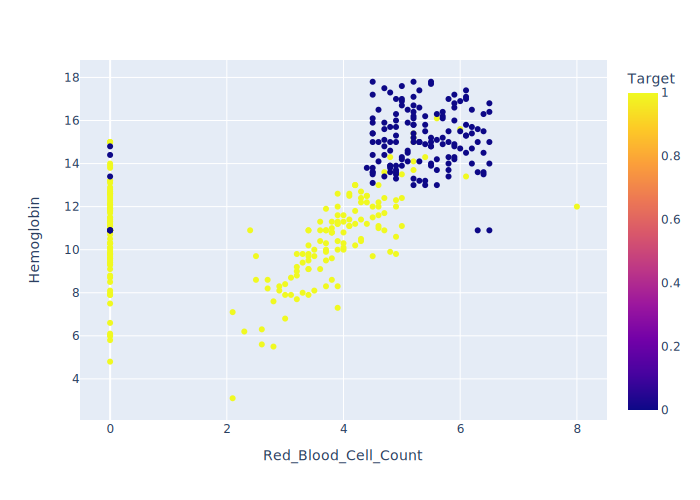

In [41]:
fig = px.scatter(data, x="Red_Blood_Cell_Count", y="Hemoglobin", color="Target")
fig.show("svg") 

1. X value: Red Blood Cell Count
2. Y value: Hemoglobin count
3. Yellow Colour: Affected by CKD
4. Blue Colour: Not CKD

#### From the above scatter plot,

1. As the Red Blood Cell Count increases, the Hemoglobin count also increases.(ie. X increases, Y also increases)
2. When Hemoglobin count between 5 and 13 and Red Blood cell count between 2 and 4.5 gets affected by CKD more.
3. The Hemoglobin count above 13 and Red Blood Cell count above 4.5 are not affected by CKD.
4. Hence, it is understood that when People have Hemoglobin count above 13 and RBC count above 4.5 will not get affected by CKD. So, People should take some measures to increase Hemoglobin and RBC in order to avoid affecting by CKD.


#### B. Age vs Blood Pressure

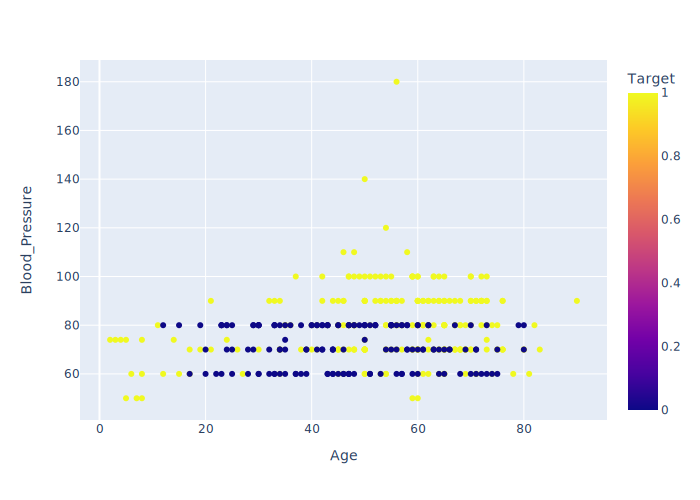

In [42]:
fig = px.scatter(data, x="Age", y="Blood_Pressure", color="Target")
fig.show("svg") 

1. X value : Age
2. Y value : Blood Pressure
3. Blue Colour : Not CKD
4. Yellow Colur : CKD

#### Hence from the above scatter plot, 

1. Age range : 40 to 75 (Affected by CKD more)
2. Blood Pressure above 90, it is said to be Stage 2 Hypertension. 
3. People affected by CKD has Blood Pressure above 90 and also their age lies between 40 to 75
4. There are people who are affected by ckd with normal blood pressure in rare case.
5. Hence High Blood Pressure also risk factors for ckd.

#### C. Red Blood Cell Count vs Packed Cell Volume

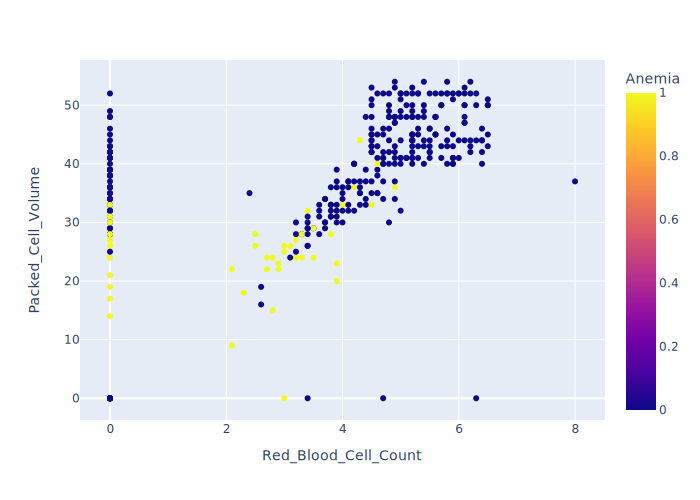

In [43]:
fig = px.scatter(data, x="Red_Blood_Cell_Count", y="Packed_Cell_Volume", color="Anemia")
fig.show("svg") 

A low PCV implies that the patient has a low number of red blood cells and is suffering from anaemia. 

1. X value: Red Blood Cell Count
2. Y value: Packed cell Volume
3. Yellow : Affected by Anemia
4. Blue   : Not affected by Anemia

Inference from scatter plot,

1. When Red Blood Cell count below 3.5 and Packed cell volume Below 30 are affected by Anemia
2. Hence low RBC count and low PCV count causes Anemia. One should not get affected by Anemia, then their PCV and RBC count should be high

In [44]:
 data.columns

Index(['Age', 'Blood_Pressure', 'Blood_Glucose_Random', 'Blood_Urea',
       'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin',
       'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count',
       'Specific_Gravity', 'Albumin', 'Sugar', 'Red_Blood_Cells', 'Pus_Cell',
       'Pus_Cell_Clumps', 'Bacteria', 'Hypertension', 'Diabetes_Mellitus',
       'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia',
       'Target'],
      dtype='object')

#### D. Red Blood Cells vs Red Blood Cell Count

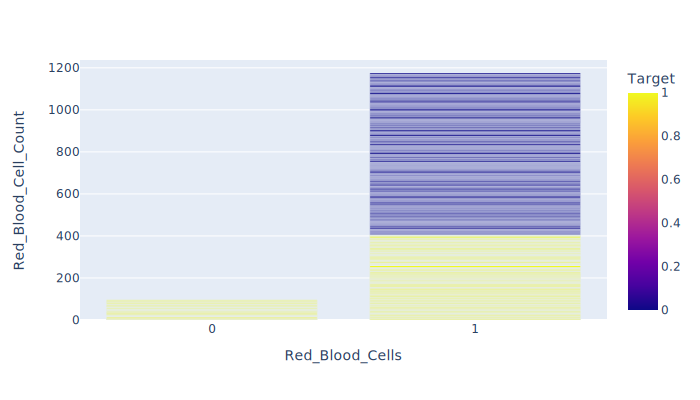

In [45]:
fig = px.bar(data, x="Red_Blood_Cells", y="Red_Blood_Cell_Count",color='Target', barmode='group',height=400)
fig.show("svg")

From the bar plot,

X axis:
    
1. '0' : Abnormal Red Blood Cell 
2. '1' : Normal Red Blood Cell 

Y axis:
    
1. Red Blood Cell Count

Colour: Yellow (Affected by CKD),
        Blue (Not affected by CKD)
        
#### Inference:

1. People having Abnormal red blood cell are tend to affected by CKD
2. People having normal red blood cell but their red blood cell count below 4.0 are also affected by CKD
3. People having normal red blood cell and RBC count also above 4.5 are not affected by CKD

#### E. Albumin vs Hemoglobin

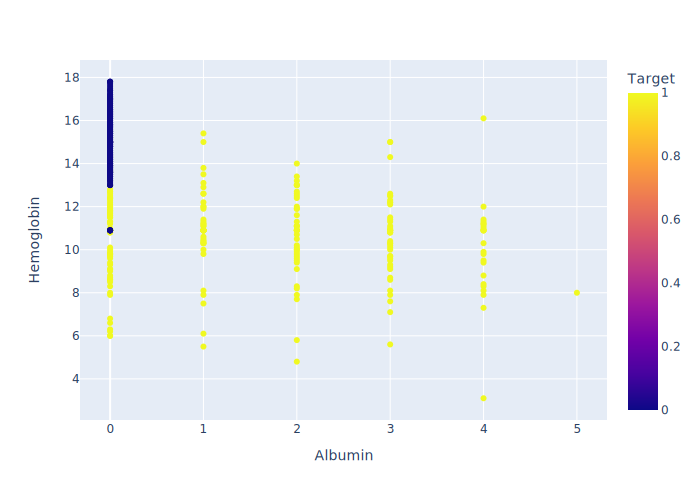

In [46]:
fig = px.scatter(data, x="Albumin", y="Hemoglobin", color="Target")
fig.show("svg") 

#### Inference:
    
1. It is observed that when Hemoglobin level greater than 13 and Albumin level 0.9 are not affected by CKD.
2. Hence people gets affected by CKD when their Hemoglobin level (<13) and Albumin level (>1).


#### F. Specific Gravity vs Packed Cell Volume

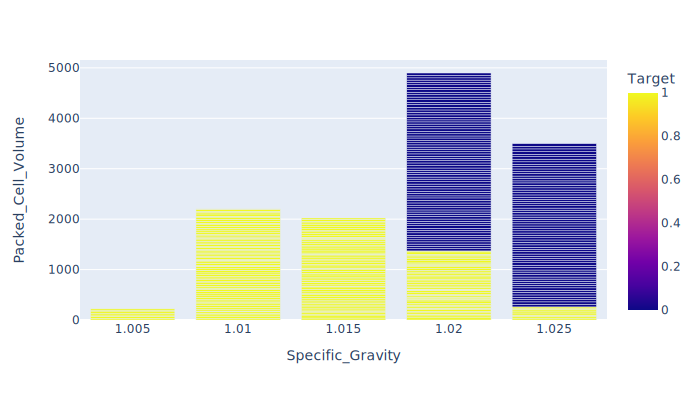

In [47]:
fig = px.bar(data, x="Specific_Gravity", y="Packed_Cell_Volume",
             color='Target', barmode='group',
             height=400)
fig.show("svg")

#### Inference:
1. It is observed that when specific gravity less than 1.02 and Packed Cell Volume below 40 chances of affecting by CKD are high.
2. Higher the Specific Gravity lesser the chances of having CKD.
3. Hence Specific gravity above 1.02 and PCV above 40 will not be affected by CKD.

#### G. Potassium vs Blood Urea

In [48]:
data['Potassium'].replace(47,4.7,inplace=True)
data['Potassium'].replace(39,3.9,inplace=True)

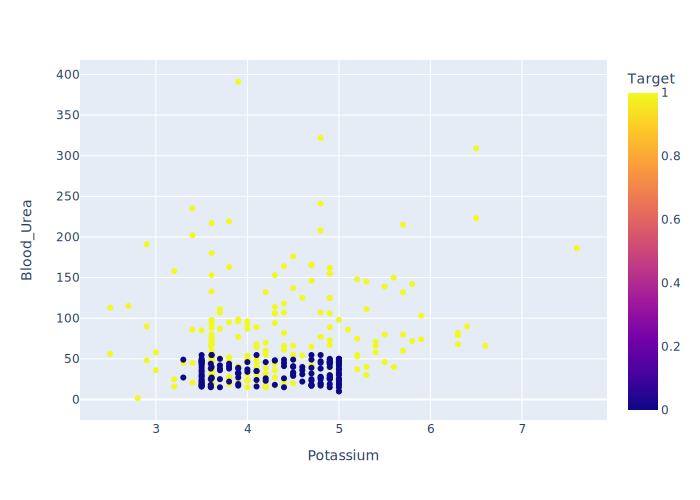

In [49]:
fig = px.scatter(data, x="Potassium", y="Blood_Urea", color="Target")
fig.show("svg")

#### Inference:

1. People are considered NOT CKD, when their Blood Urea level ranges between 10 to 50 and Potassium level 3.5 to 5
2. People are considered as CKD, when their Blood Urea level are high i.e. Above 50 and Potassium level 3.5 to 6

#### H. Potassium vs Target (CKD)

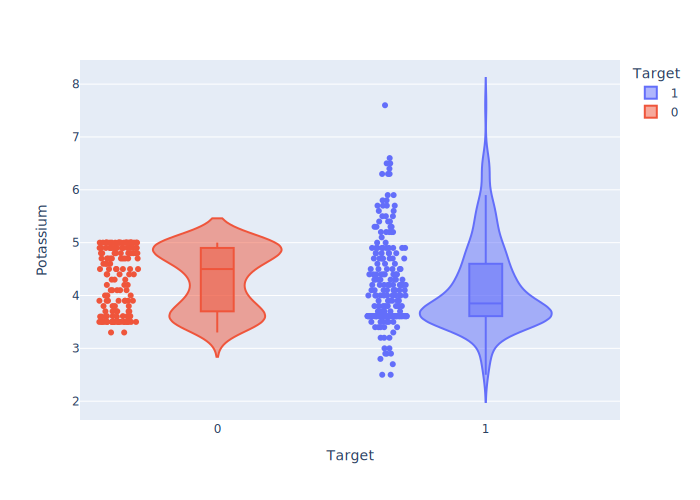

In [50]:
def violin(col): 
    fig = px.violin(data, y=col, x="Target", color="Target", box=True, points="all", hover_data=data.columns)
    return fig.show("svg")
violin(data['Potassium'])

1. our body uses the potassium it needs. The extra potassium that your body does not need is removed from your blood by your kidneys. When you have kidney disease, your kidneys cannot remove extra potassium in the right way, and too much potassium can stay in your blood.
2. From the above plots we can see that those people who are suffering from chronic kidney disease contain higher potassium since their kidney is unable to remove extra potassium, but we have also observed that people are still suffering through chronic disease even if they have normal range of potassium.


#### I. Hypertension vs Blood Pressure

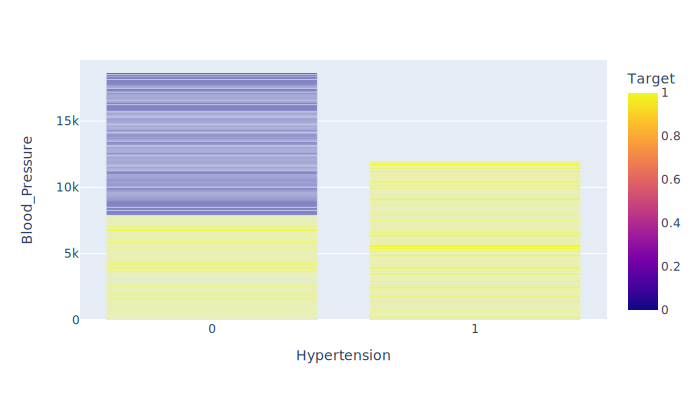

In [51]:
fig = px.bar(data, x="Hypertension", y="Blood_Pressure",color='Target', barmode='group',height=400)
fig.show("svg")

Most of the people suffering from Hypertension having CKD. We can see that when Blood Pressure stays normal and No hypertension then there is no CKD. 

#### J. Age vs Target(CKD)

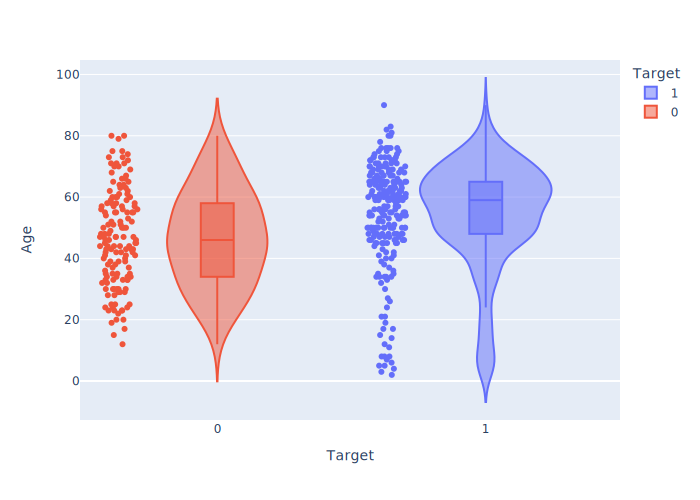

In [52]:
violin(data['Age'])

1. Age is between 2 to 90, that is even 2 years kid and 90 year person suffering from chronic kidney diseases, so through visualisation we can say that there is no such specific age gruop is suffering from ckd.
2. CKD distribution is slightly left skewed with high concentration of data between 40-76. There are few outliers on the lower spectrum of age

#### COMPLETE INFERENCE FROM EXPLORATORY ANALYSIS

1. Age Groups : 2 - 90 but Age group(40 - 75) gets affected by CKD more.
2. Red Blood Cell Count : (below 4.5) and Hemoglobin count : (between 5 and 13) gets affected by CKD more.
3. If Age group (between 40 to 75) and their Blood Pressure level above 90 then they have chances of getting affected by CKD.
4. Low Red Blood Cell Count (below 3.5) and low Packed Cell Volume (below 30) can cause Anemia.
5. People with Abnormal RBC and Normal RBC with low RBC count can get affected by CKD.
6. Hemoglobin level less than 13 and Albumin level greater than 1 can cause CKD.
7. when specific gravity less than 1.02 and Packed Cell Volume below 40 chances of affecting by CKD are high.
8. when their Blood Urea level are high i.e. Above 50 and Potassium level are between 3.5 to 6 then chances are high for CKD.
9. people suffering from hypertension can have CKD.
10. High Potassium in Body can also reason for CKD.
11. Higher the serum creatinine level i.e >1.2, people likely to have chronic kidney diseases.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### FEATURE SELECTION

#### IMPORTANT FEATURES IN DATASET

In [53]:
y = data['Target']
X = data.drop(['Target'], axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

[0.00711749 0.00788231 0.023777   0.01507767 0.02246624 0.03017732
 0.00840339 0.08788005 0.07243653 0.01975174 0.13762132 0.11741776
 0.06222251 0.00952323 0.01431992 0.03401263 0.00527645 0.00161681
 0.1382079  0.11955144 0.0026252  0.03309486 0.01748836 0.01205186]


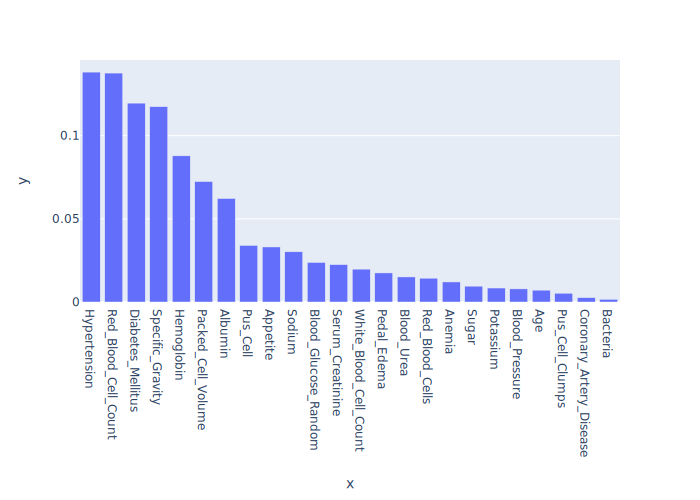

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

fig = px.bar(feat_importances, x=feat_importances.nlargest(25).index, y=feat_importances.nlargest(25))
fig.show("svg")

#### 1. Dropping Features which has very low variance 

In [56]:
y = data['Target']
X = data.drop(['Target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

var = VarianceThreshold(threshold=0)
var.fit(X_train)

Constant_features = [i for i in X_train.columns
                    if i not in X_train.columns[var.get_support()]]
X_train.drop(Constant_features,inplace=True)

In [57]:
X_train.shape

(280, 24)

There are no such features with respect to that threshold value, so no feature have been dropped.

#### 2. Dropping Features using Pearson Correlation

<AxesSubplot:>

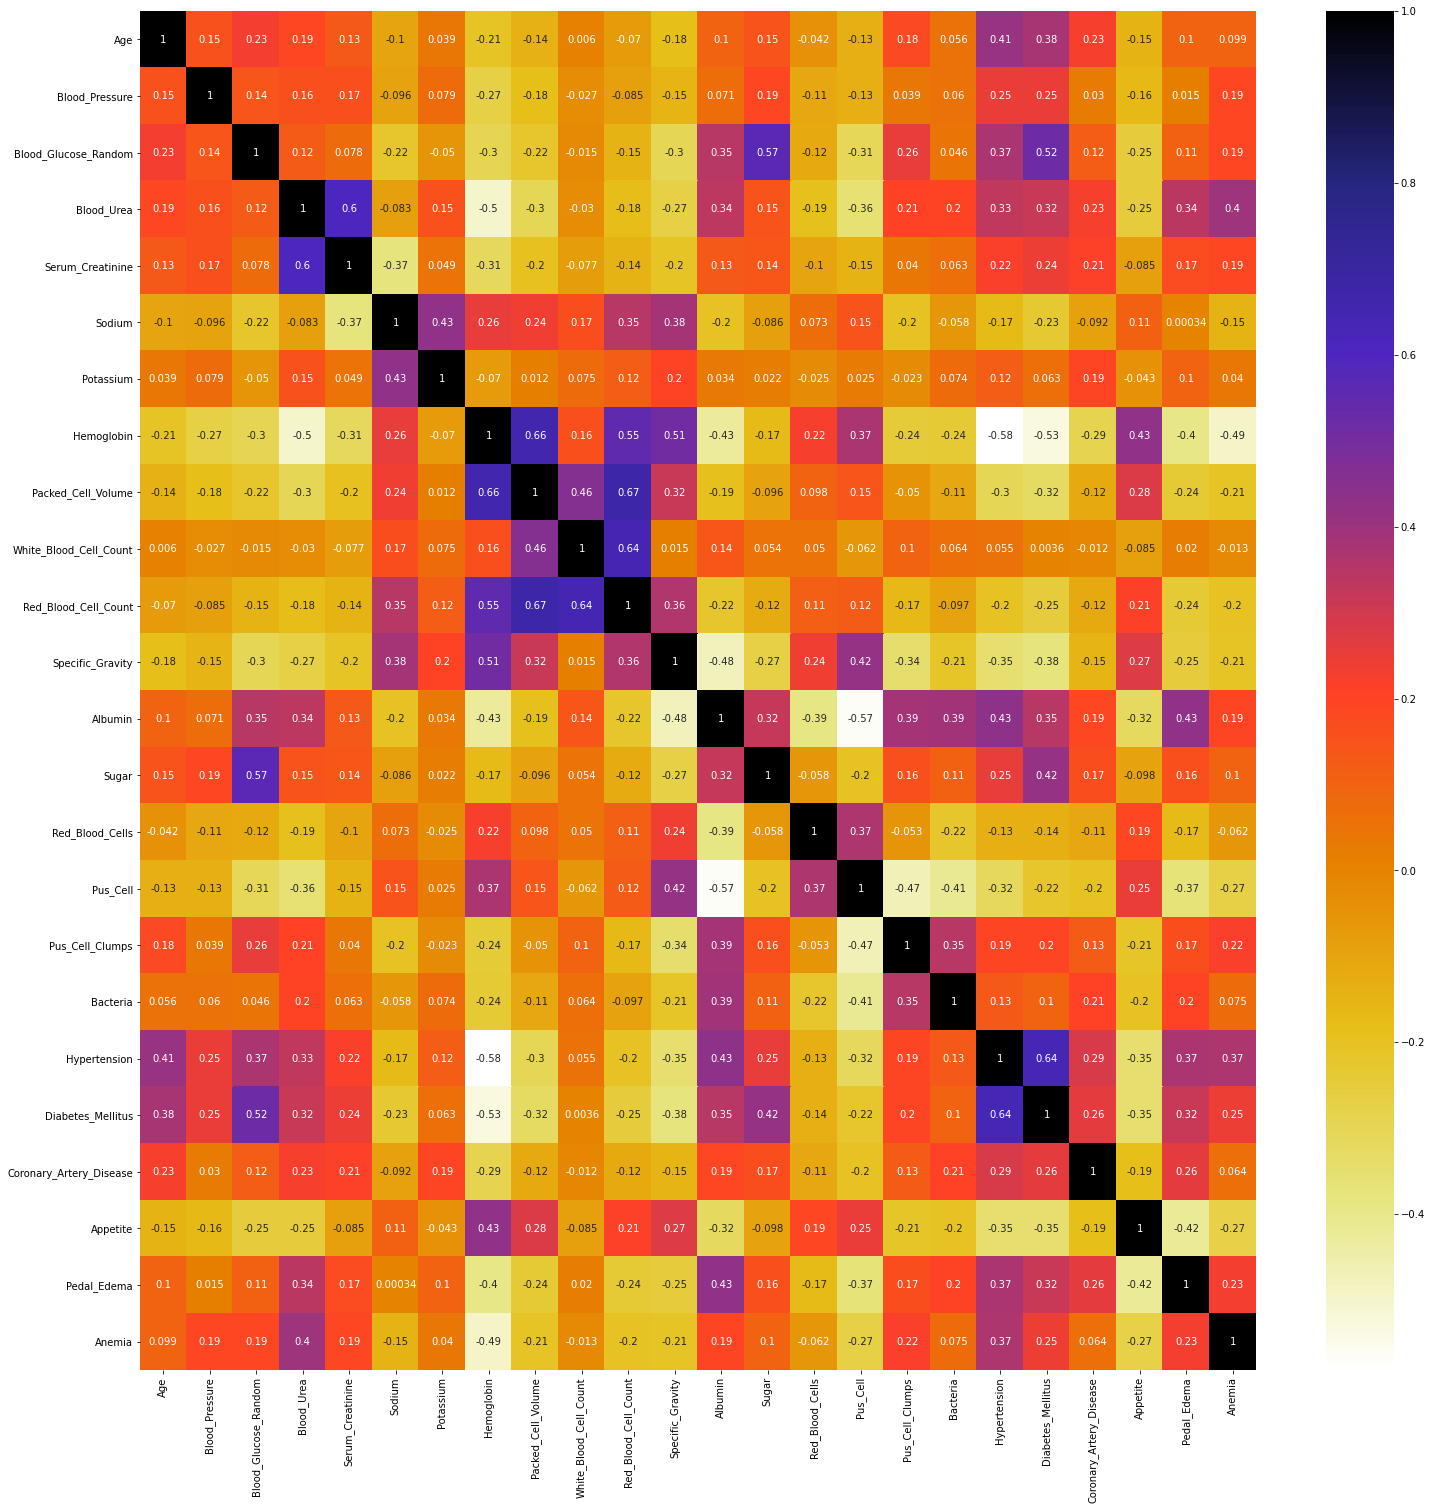

In [58]:
Cor = X_train.corr()
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(Cor,annot=True,ax=ax,cmap=plt.cm.CMRmap_r)

#### Considering Absolute Correlation Above 60%:
1. Hypertension and Diabetes Mellitus : 61% *
2. Hemoglobin and RBC Count: 75% *
3. Packed cell volume and RBC count: 66% 
4. Hemoglobin and Packed cell volume: 65% *
5. BGR and Sugar: 63%

In [59]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [60]:
corr_features = correlation(X_train,0.6)
len(set(corr_features))

5

In [61]:
corr_features

{'Blood_Urea',
 'Hemoglobin',
 'Hypertension',
 'Packed_Cell_Volume',
 'White_Blood_Cell_Count'}

In [62]:
X_train = X_train.drop(corr_features,axis=1)

In [63]:
X_test = X_test.drop(corr_features,axis=1)

In [64]:
X_train.shape

(280, 19)

In [65]:
X_test.shape

(120, 19)

### Shuffle Split Cross Validation vs Hold Out Approach Cross Validation

In [66]:
ssplit = ShuffleSplit(n_splits=10,test_size=0.30)

#### 1. a) LOGISTIC REGRESSION ( Hold Out Approach )

In [67]:
clf = LogisticRegression(random_state=0,max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [68]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       1.00      0.92      0.96        76

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.95
Precision: 1.0
Recall: 0.9210526315789473


#### 1. b) LOGISTIC REGRESSION ( Shuffle Split Cross Validation )

In [70]:
clf = LogisticRegression()
result = cross_val_score(clf,X,y,cv=ssplit)
print(result,"\n")
print("Accuracy : ", np.mean(result))

[0.925      0.90833333 0.93333333 0.94166667 0.94166667 0.94166667
 0.95       0.925      0.90833333 0.975     ] 

Accuracy :  0.9349999999999999


#### 2. a) DECISION TREE CLASSIFIER ( Hold Out Approach )

In [71]:
dt_model = DecisionTreeClassifier(random_state=23)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

Accuracy: 0.9583333333333334
Precision: 0.9863013698630136
Recall: 0.9473684210526315


#### 2. b) DECISION TREE CLASSIFIER ( Shuffle Split Cross Validation )

In [73]:
dt_model = DecisionTreeClassifier()
result = cross_val_score(dt_model,X,y,cv=ssplit)
print(result,"\n")
print("Accuracy : ", np.mean(result))

[0.95       0.98333333 0.96666667 0.95833333 0.975      0.95833333
 0.975      0.95833333 0.98333333 0.95833333] 

Accuracy :  0.9666666666666666


#### 3. a) RANDOM FOREST CLASSIFIER ( Hold Out Approach )

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_pred))

Classification Report for Test Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



#### 3. b) RANDOM FOREST CLASSIFIER ( Shuffle Split Cross Validation )

In [75]:
rf = RandomForestClassifier()
result = cross_val_score(rf,X,y,cv=ssplit)
print(result,"\n")
print("Accuracy: ", np.mean(result))

[1.         0.99166667 0.99166667 0.98333333 1.         1.
 1.         0.98333333 1.         0.99166667] 

Accuracy:  0.9941666666666666


#### 4. a) K NEAREST NEIGHBOR ( Hold Out Approach )

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [77]:
y_pred = knn.predict(X_test)
print('Classification Report for Test Set\n')
print(classification_report(y_test, y_pred))

Classification Report for Test Set

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        44
           1       0.97      0.75      0.84        76

    accuracy                           0.82       120
   macro avg       0.83      0.85      0.82       120
weighted avg       0.86      0.82      0.83       120



In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.825
Precision: 0.9661016949152542
Recall: 0.75


#### 4. b) K NEAREST NEIGHBOR ( Shuffle Split Cross Validation )

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
result = cross_val_score(knn,X,y,cv=ssplit)
print(result,"\n")
print("Accuracy: ", np.mean(result))

[0.7        0.71666667 0.69166667 0.74166667 0.76666667 0.775
 0.71666667 0.775      0.76666667 0.69166667] 

Accuracy:  0.7341666666666666
